# Difference between Random-Forest & Bagging

##### There are two major Differences in between them:
* We can use any algorithm in the bagging as a base model but in Random Forest we can only use the Decision Tree Algorithm as a base model.

***Now question is that what if i use the Decision tree algorithm in the Bagging as a base model so can it be a Random Forest model?***

***so the answer is NO! There is also a 2nd major difference which is below***!

* When we do the feature sampling for the Bagging so it done only one time.But in Random Forest sampling is done multiple times for every node creation sampling process will repeated.
* There is Tree level sampling in Bagging and Node level sampling in Random Forest.

The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

<img title='Bagging VS Random Forest' src='images/bagging VS random forest.png' width=600 />

# Understanding Through Code

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.932413,-0.857315,-2.166440,-4.020247,1.586134,1
1,-0.661271,0.219186,0.095432,-0.273881,1.454491,1
2,2.581037,-1.318725,0.063358,-0.068973,2.641281,1
3,-1.998175,2.536369,0.066130,0.102137,-0.670663,0
4,2.244299,-0.511405,-0.590372,0.153317,2.909403,1


In [4]:
bag = BaggingClassifier(max_features=2) # column sampling

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

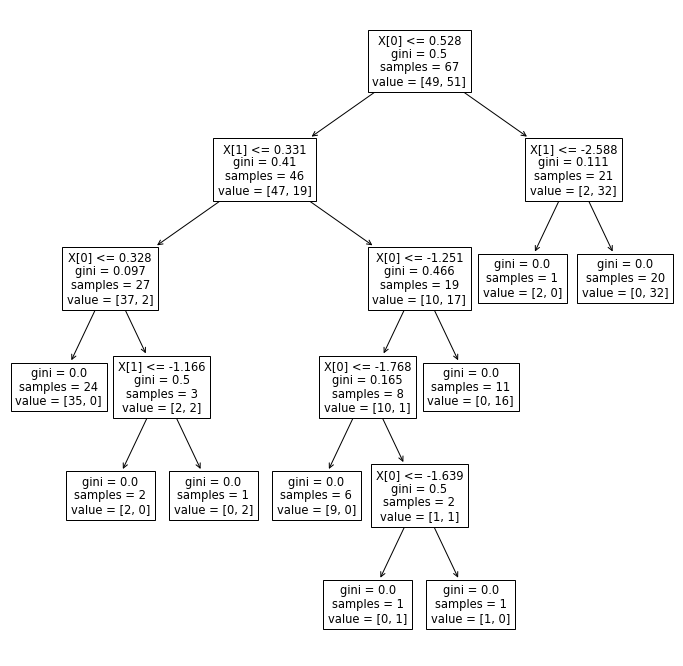

In [7]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()
# so we can see that Bagging take only 2 columns so it is Tree level sampling

In [8]:
rf = RandomForestClassifier(max_features=2)

In [9]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

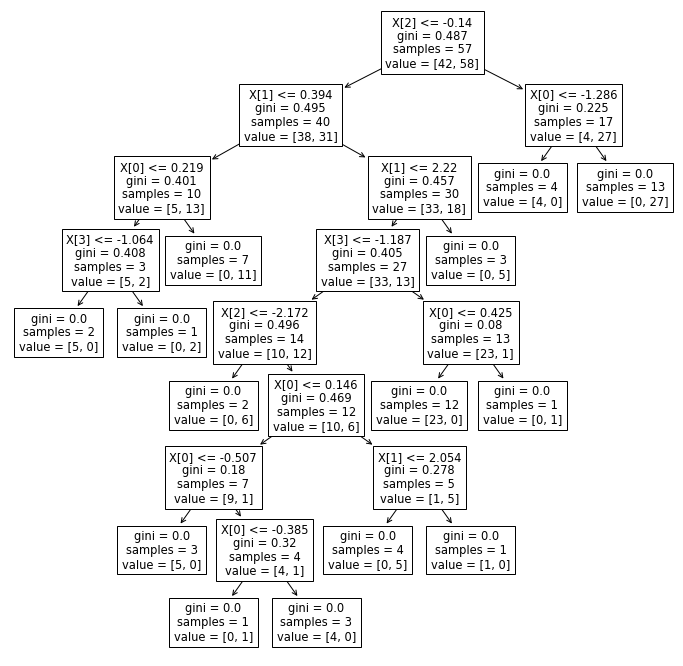

In [10]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()
# and here we can see that Random Forest take multiple columns (it takes all columns for sampling)
# So it is node level sampling

The Randomness in the Random Forest is more than Bagging and we already know that in Ensemble learning greater amount of randomness is best of better accuracy. Because it use the majority counts and for regression problem it use mean count so when our data is randomly splited the accuracy would be good then!